In [1]:
#url = 'https://raw.githubusercontent.com/flavianowilliams/M3L/development/src/notebooks/argon/Ar_94K_1atm.json'
#from urllib.request import urlopen
#file = urlopen(url)
#with open('Ar_94K_1atm.json','wb') as output:
#  output.write(file.read())
#
# carregando sistema físico
from m3l.structure import System as sys
import json
#
system = sys()
#system.loadSystem('teste.json')
system.loadSystem('Ar_94K_1atm.json')
#
# convertendo as unidades de medida
system.convertUnits()

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
dataset = np.loadtxt("thermodynamics.csv", dtype=np.float32, delimiter = ",", skiprows=1)
time = [item[0].item() for item in dataset]
vol = [item[1].item() for item in dataset]

Densidade experimental: 1.397 g/cm³
Densidade calculada: 1.438 g/cm³
Erro percentual: 3.0 %



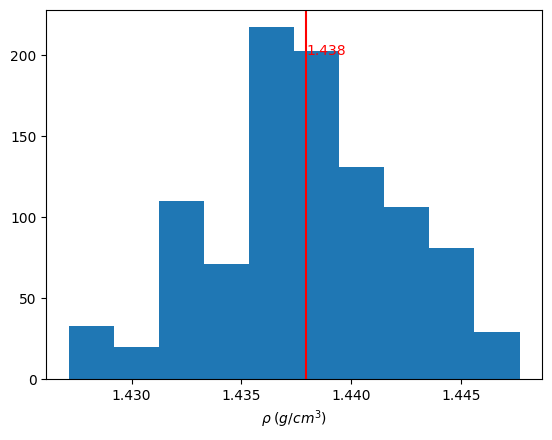

In [4]:
import statistics as stats
natom = system.natom
densidade_experimental = 1.397
densidade = list(map(lambda u: natom*39.948/(0.602*u), vol))
densidade_teorica = np.mean(densidade)
erro = abs((densidade_teorica-densidade_experimental)*100/densidade_experimental)
print(f'Densidade experimental: {round(densidade_experimental, 3)} g/cm³')
print(f'Densidade calculada: {round(densidade_teorica, 3)} g/cm³')
print(f'Erro percentual: {round(erro, 0)} %')
print()
plt.hist(densidade)
plt.xlabel("$\\rho\\;(g/cm^3)$")
plt.axvline(densidade_teorica, color = 'red')
plt.annotate(text = f'{round(densidade_teorica, 3)}', xy = (densidade_teorica, 200), xytext = (densidade_teorica, 200), color = 'red')
plt.show()

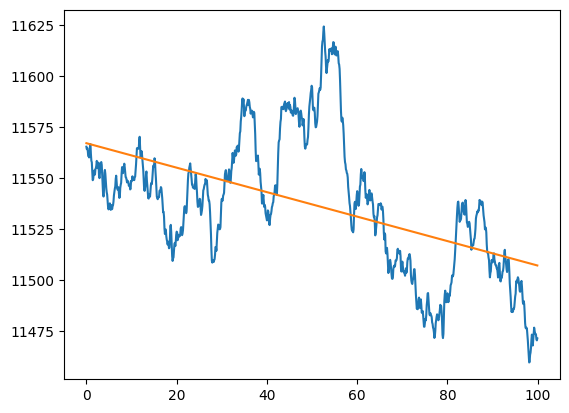

In [5]:
from sklearn.linear_model import LinearRegression
regressao = LinearRegression()
regressao.fit(np.array(time).reshape((-1,1)), np.array(vol))
A = regressao.coef_
B = regressao.intercept_
y = list(map(lambda u: A*u+B, time))
plt.plot(time, vol)
#print(y)
plt.plot(np.array(time).reshape((-1, 1)), np.array(y))

In [6]:
# teste de normalidade de Shapiro-Wilk
from scipy import stats
statistic, pvalue = stats.shapiro(densidade)
print(f'Valor-p: {pvalue}')
if pvalue >= 0.05:
    print('A distribuição é considerada normal.')
else:
    print('A distribuição NÃO é considerada normal.')

Valor-p: 4.2428589377976834e-07
A distribuição NÃO é considerada normal.
